In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df_spotify = pd.read_csv("D:\Sneha personal\PROJECTS\Data Analysis projects\Spotify Data Analysis\SpotifyFeatures.csv")


In [3]:
df_spotify.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
df_spotify.shape

(232725, 18)

In [5]:
missing_values = df_spotify.isnull().sum()

In [6]:
missing_values


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
df_spotify.dropna(subset=['tempo', 'mode', 'speechiness', 'time_signature', 'valence'], inplace=True)

In [8]:
df_spotify['tempo'].isnull().sum()

0

In [9]:
df_spotify['mode'].isnull().sum()

0

In [10]:
df_spotify['speechiness'].isnull().sum()

0

In [11]:
df_spotify['time_signature'].isnull().sum()

0

In [12]:
df_spotify['valence'].isnull().sum()

0

In [13]:
df_spotify.duplicated().sum()

0

In [14]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [15]:
df_spotify.describe().T

count           mean            std          min  \
popularity        232725.0      41.127502      18.189948      0.00000   
acousticness      232725.0       0.368560       0.354768      0.00000   
danceability      232725.0       0.554364       0.185608      0.05690   
duration_ms       232725.0  235122.339306  118935.909299  15387.00000   
energy            232725.0       0.570958       0.263456      0.00002   
instrumentalness  232725.0       0.148301       0.302768      0.00000   
liveness          232725.0       0.215009       0.198273      0.00967   
loudness          232725.0      -9.569885       5.998204    -52.45700   
speechiness       232725.0       0.120765       0.185518      0.02220   
tempo             232725.0     117.666585      30.898907     30.37900   
valence           232725.0       0.454917       0.260065      0.00000   

                          25%            50%          75%          max  
popularity            29.0000      43.000000      55.0000      100.000  
acousticness           0.0376       0.232000       0.7220        0.996  
danceability           0.4350       0.571000       0.6920        0.989  
duration_ms       182857.0000  220427.000000  265768.0000  5552917.000  
energy                 0.3850       0.605000       0.7870        0.999  
instrumentalness       0.0000       0.000044       0.0358        0.999  
liveness               0.0974       0.128000       0.2640        1.000  
loudness             -11.7710      -7.762000      -5.5010        3.744  
speechiness            0.0367       0.050100       0.1050        0.967  
tempo                 92.9590     115.778000     139.0540      242.903  
valence                0.2370       0.444000       0.6600        1.000

In [16]:
genre_counts = df_spotify['genre'].value_counts()
genre_counts

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

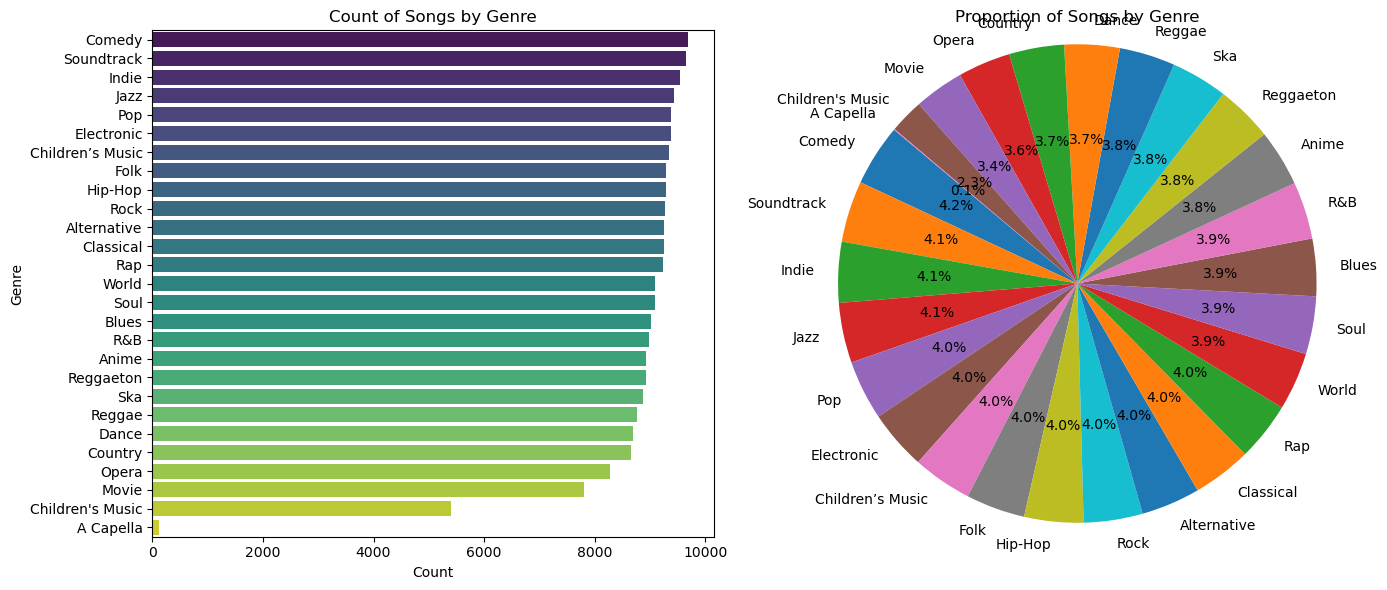

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot bar plot on the first subplot
sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genre')
axes[0].set_title('Count of Songs by Genre')

# Plot pie chart on the second subplot
axes[1].pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Proportion of Songs by Genre')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlapping
plt.tight_layout()

In [18]:
artist_counts = df_spotify['artist_name'].value_counts()
artist_counts


artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64

In [19]:
top_artists = artist_counts.head(10)
top_artists

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Name: count, dtype: int64

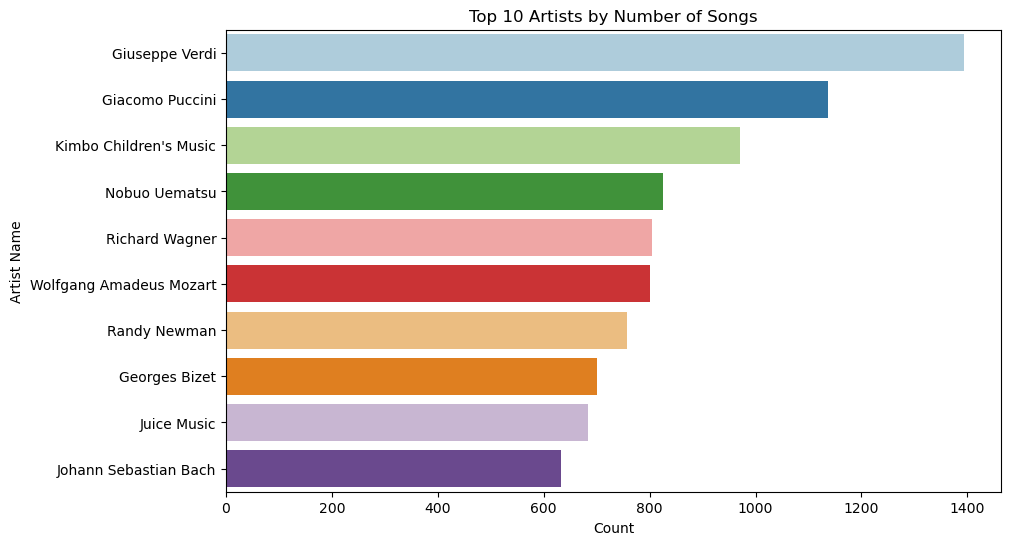

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Paired')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists by Number of Songs')
plt.show()

In [21]:
track_counts = df_spotify['track_name'].value_counts()
track_counts

track_name
Home                                                           100
You                                                             71
Intro                                                           69
Stay                                                            63
Wake Up                                                         59
                                                              ... 
Siegfried / Zweiter Aufzug: Vorspiel                             1
Die Walküre / Zweiter Aufzug: "Siegmund! Sieh auf mich!"         1
Puccini: Tosca, Act 1: "Ah! Finalmente!" (Angelotti) [Live]      1
Harpsichord Sonata No. 11 in F Major: I. Moderato                1
You Don't Have To Hurt No More                                   1
Name: count, Length: 148614, dtype: int64

In [22]:
top_tracks = track_counts.head(10)
top_tracks

track_name
Home           100
You             71
Intro           69
Stay            63
Wake Up         59
Closer          58
Forever         57
Without You     56
Smile           55
Beautiful       50
Name: count, dtype: int64

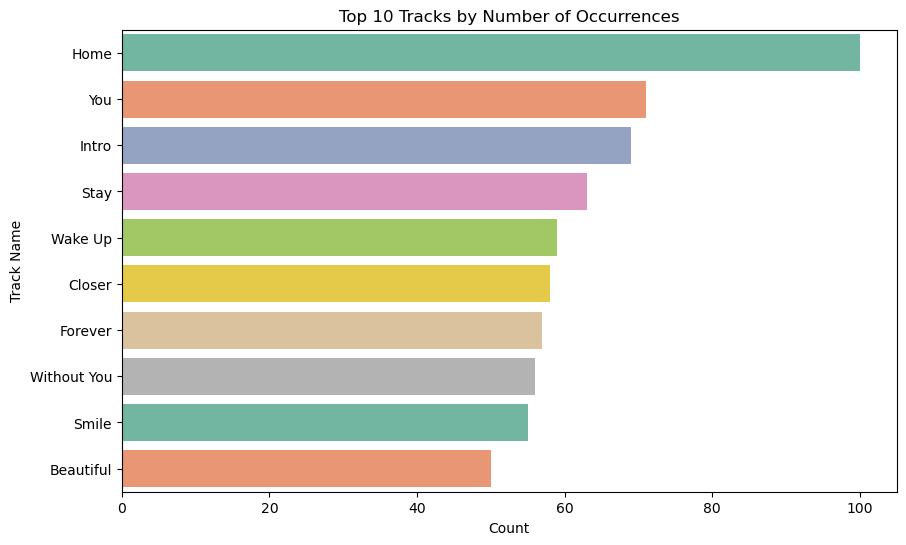

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Number of Occurrences')
plt.show()

In [24]:
df_spotify['track_id'].value_counts()

track_id
3R73Y7X53MIQZWnKloWq5i    8
0wY9rA9fJkuESyYm9uzVK5    8
6sVQNUvcVFTXvlk3ec0ngd    8
0UE0RhnRaEYsiYgXpyLoZc    8
6AIte2Iej1QKlaofpjCzW1    8
                         ..
2sERVoTuQG14MKze0PuLZd    1
2rQCKDafhIA6GKPGiZsyfI    1
150kk5S2hUULZD4yApAwSH    1
7cq0WqlooYmk0u2EQeA85S    1
34XO9RwPMKjbvRry54QzWn    1
Name: count, Length: 176774, dtype: int64

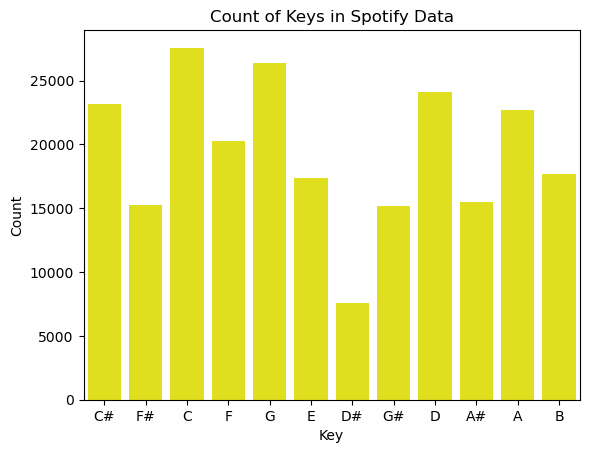

In [25]:
key_counts = df_spotify['key'].value_counts()
sns.countplot(data=df_spotify, x='key', color = 'yellow')
plt.title('Count of Keys in Spotify Data')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

In [26]:
mode_counts = df_spotify['mode'].value_counts()
mode_counts

mode
Major    151744
Minor     80981
Name: count, dtype: int64

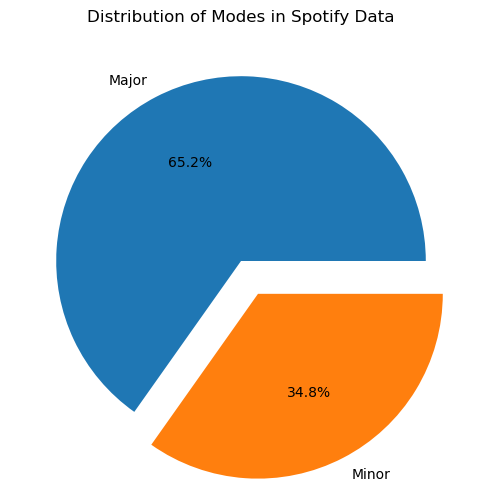

In [27]:
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', explode=[0,0.2])
plt.title('Distribution of Modes in Spotify Data')
plt.show()

In [28]:
df_spotify['time_signature'].value_counts()


time_signature
4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: count, dtype: int64

In [29]:
df_spotify.columns


Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

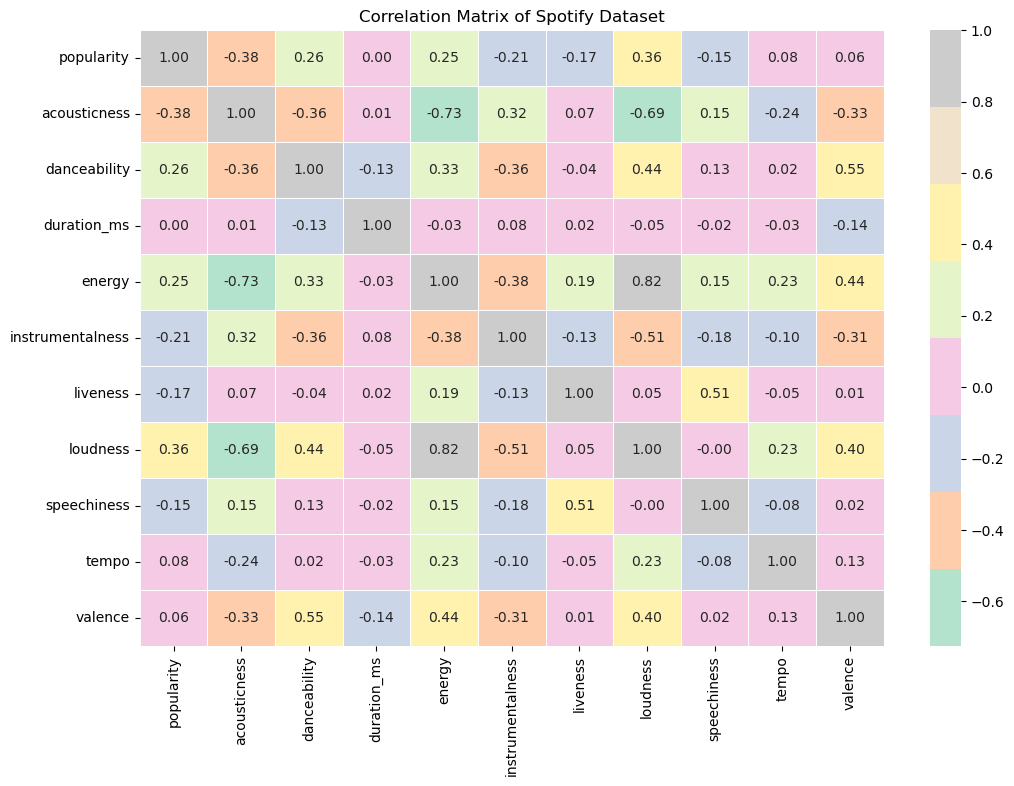

In [30]:
numerical_columns = df_spotify.select_dtypes(include=['number'])
cor = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spotify Dataset')
plt.show()

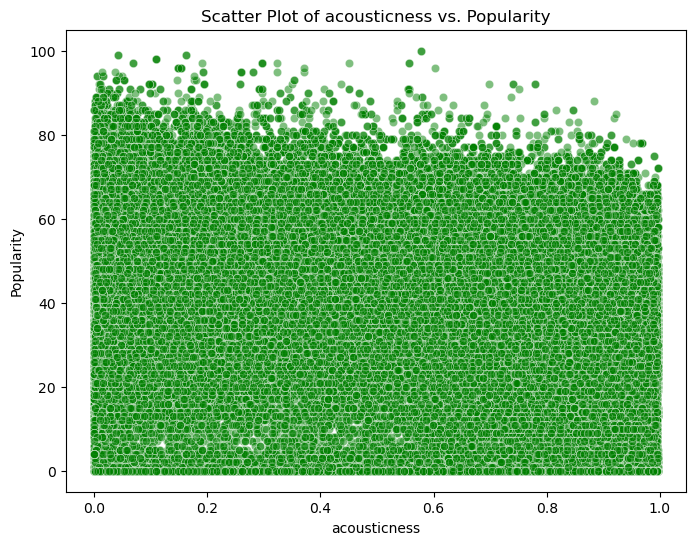

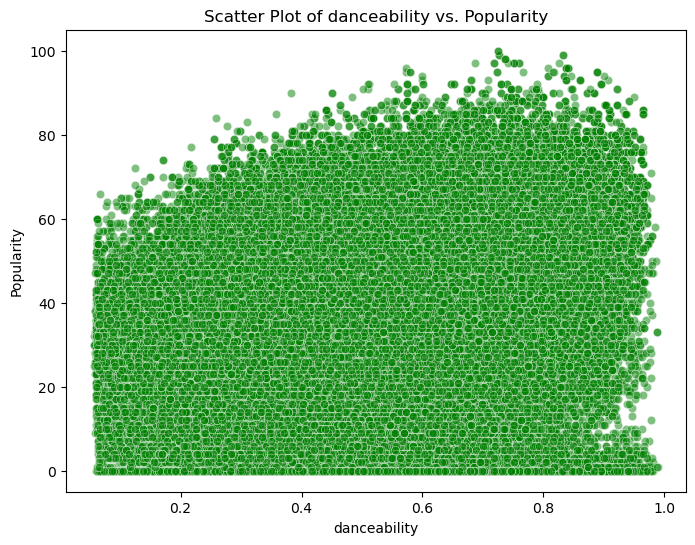

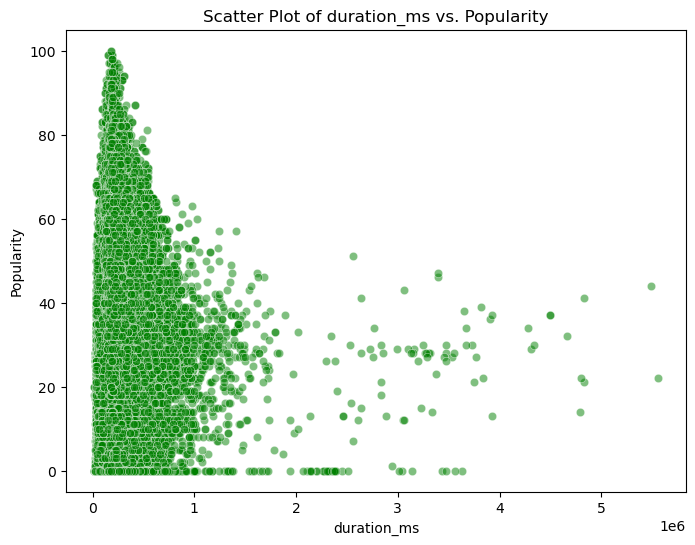

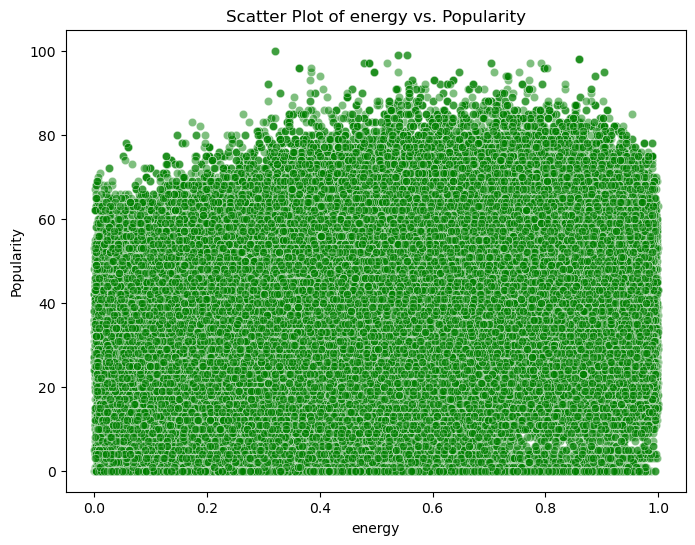

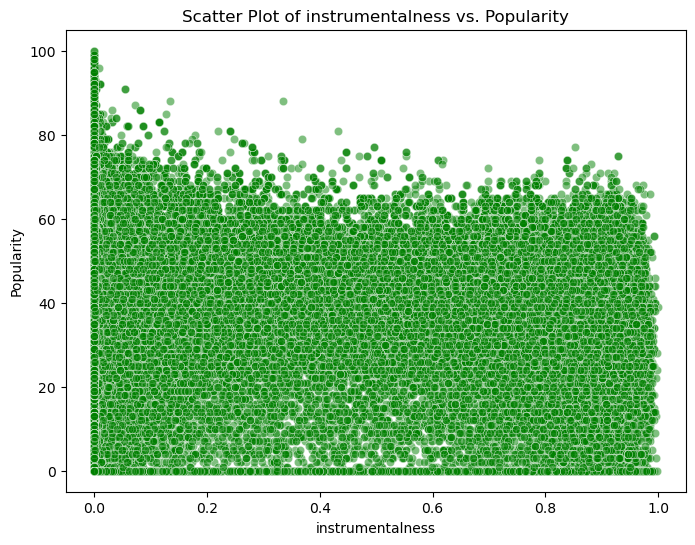

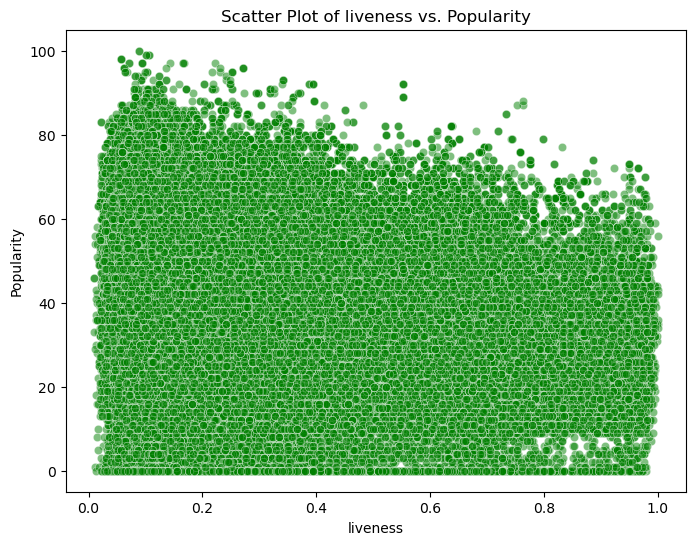

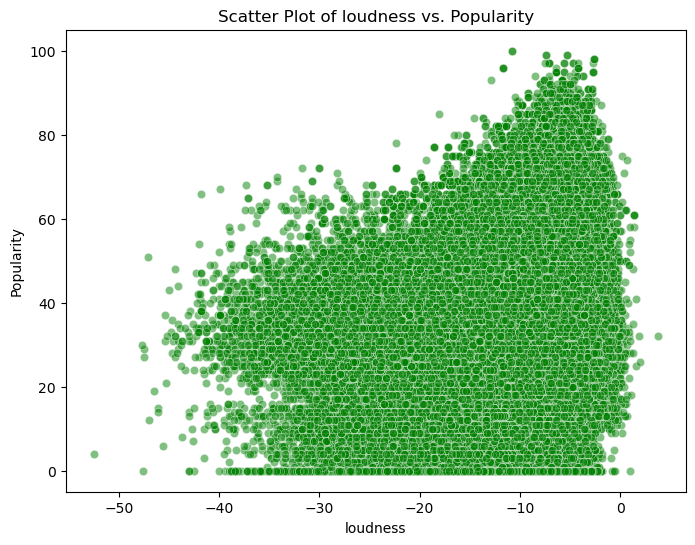

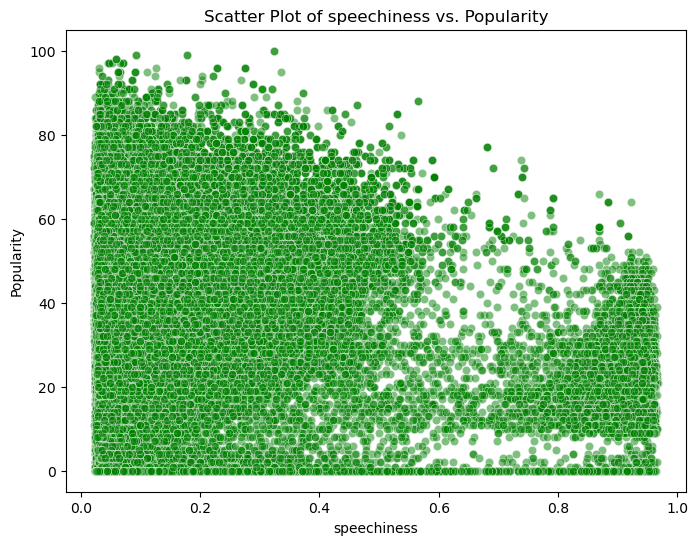

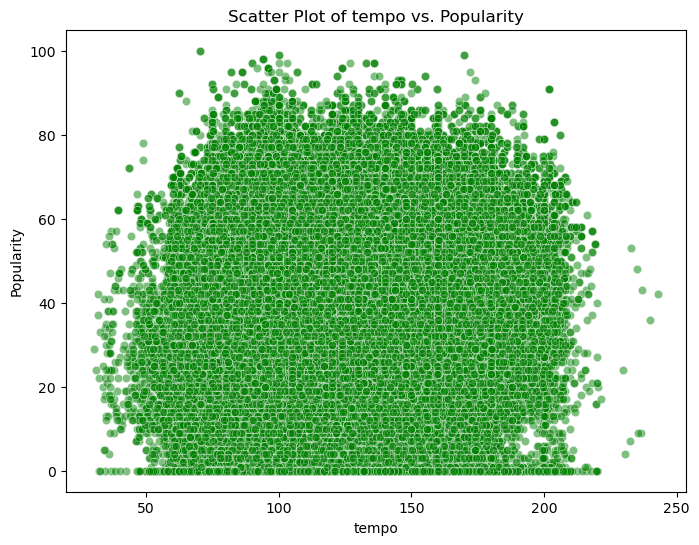

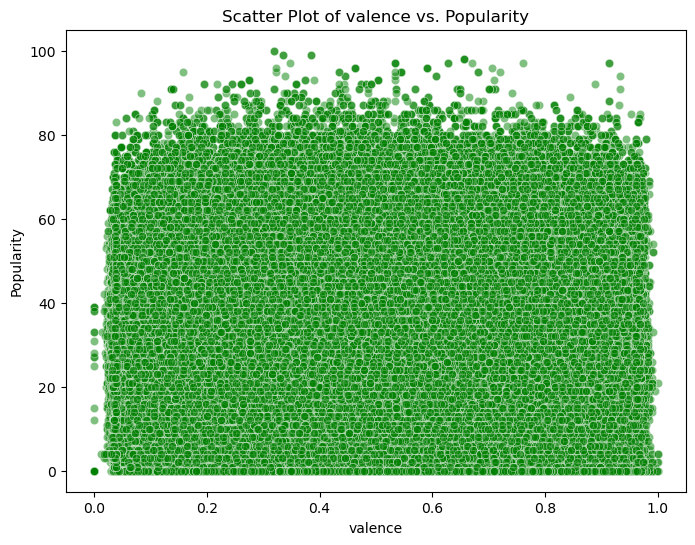

In [31]:
numerical_columns = df_spotify.select_dtypes(include=np.number).drop(columns=['popularity'])
# Plotting scatter plots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_spotify, x=column, y='popularity', color = 'green', alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs. Popularity')
    plt.xlabel(column)
    plt.ylabel('Popularity')
    plt.show()

In [32]:
df_spotify['duration_seconds'] = df_spotify['duration_ms'] / 1000
df_spotify['duration_seconds']

0          99.373
1         137.373
2         170.267
3         152.427
4          82.625
           ...   
232720    326.240
232721    282.447
232722    166.960
232723    222.442
232724    323.027
Name: duration_seconds, Length: 232725, dtype: float64

In [33]:
df_spotify['tempo_bpm'] = df_spotify['tempo'] * 60


In [34]:
df_spotify['loudness_normalized'] = (df_spotify['loudness'] - df_spotify['loudness'].min()) / (df_spotify['loudness'].max() - df_spotify['loudness'].min())

In [35]:
df_spotify['energy_danceability_interaction'] = df_spotify['energy'] * df_spotify['danceability']

In [36]:
popularity_bins = [0, 25, 50, 75, 100]
popularity_labels = ['low', 'medium', 'high', 'very high']
df_spotify['popularity_category'] = pd.cut(df_spotify['popularity'], bins=popularity_bins, labels=popularity_labels)

In [37]:
df_spotify = pd.get_dummies(df_spotify, columns=['genre', 'key', 'mode'])

In [38]:
df_spotify.drop(['duration_ms', 'tempo', 'loudness'], axis=1, inplace=True)
df_spotify.head()

artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  energy  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   0.910   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   0.737   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   0.131   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   0.326   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   0.225   

   instrumentalness  liveness  speechiness  ... key_C#  key_D  key_D#  key_E  \
0             0.000    0.3460       0.0525  ...   True  False   False  False   
1             0.000    0.1510       0.0868  ...  False  False   False  False   
2             0.000    0.1030       0.0362  ...  False  False   False  False   
3             0.000    0.0985       0.0395  ...   True  False   False  False   
4             0.123    0.2020       0.0456  ...  False  False   False  False   

   key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0  False   False  False   False        True       False  
1  False    True  False   False       False        True  
2  False   False  False   False       False        True  
3  False   False  False   False        True       False  
4   True   False  False   False        True       False  

[5 rows x 58 columns]

In [39]:
df_spotify.columns


Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
       'time_signature', 'valence', 'duration_seconds', 'tempo_bpm',
       'loudness_normalized', 'energy_danceability_interaction',
       'popularity_category', 'genre_A Capella', 'genre_Alternative',
       'genre_Anime', 'genre_Blues', 'genre_Children's Music',
       'genre_Children’s Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'key_A', 'key_A#', 'key_B', 'key_C',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'mode_Major', 'mode_Minor'],
      dtype='object')

C:\Users\adala\AppData\Local\Temp\ipykernel_13924\468893999.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_df_spotify, ax=ax[0])
C:\Users\adala\AppData\Local\Temp\ipykernel_13924\468893999.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_df_spotify, ax=ax[1])


Text(0.5, 1.0, 'Scaled df_spotify')

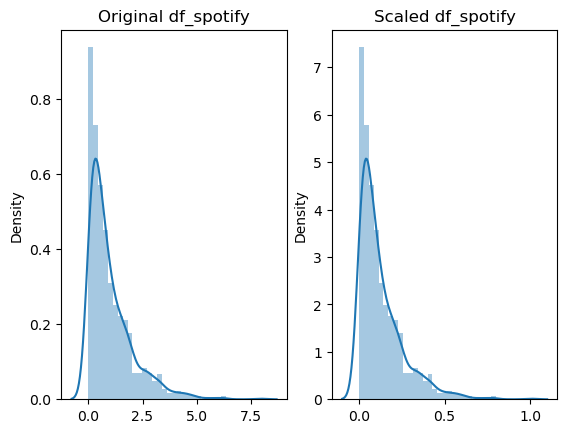

In [40]:
original_df_spotify= np.random.exponential(size = 1000).reshape(-1, 1)

scaler = MinMaxScaler()
#scale the out_df between 0 and 1
scaled_df_spotify = scaler.fit_transform(original_df_spotify)
fig, ax=plt.subplots(1,2)
sns.distplot(original_df_spotify, ax=ax[0])
ax[0].set_title("Original df_spotify")
sns.distplot(scaled_df_spotify, ax=ax[1])
ax[1].set_title("Scaled df_spotify")

In [41]:
y = df_spotify['popularity']
X = df_spotify.drop(columns = ['popularity'], axis = 1)


In [42]:
label_encoder = LabelEncoder()

# Iterate over each column in X and apply LabelEncoder
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Fit and transform the target variable y
y_encoded = label_encoder.fit_transform(y)

# Split the encoded target variable and the features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186180 entries, 200510 to 121958
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   artist_name                      186180 non-null  int32
 1   track_name                       186180 non-null  int32
 2   track_id                         186180 non-null  int32
 3   acousticness                     186180 non-null  int64
 4   danceability                     186180 non-null  int64
 5   energy                           186180 non-null  int64
 6   instrumentalness                 186180 non-null  int64
 7   liveness                         186180 non-null  int64
 8   speechiness                      186180 non-null  int64
 9   time_signature                   186180 non-null  int32
 10  valence                          186180 non-null  int64
 11  duration_seconds                 186180 non-null  int64
 12  tempo_bpm                     

In [44]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 83.99142161280606


In [45]:
# Define thresholds for popularity categories
low_threshold = 20
high_threshold = 80

# Convert popularity predictions and actual values to categories
predicted_categories = pd.cut(y_pred, bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=[0, 1, 2])
actual_categories = pd.cut(y_test, bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=[0, 1, 2])

# Calculate accuracy
accuracy = accuracy_score(actual_categories, predicted_categories)

In [46]:
accuracy

0.9077881619937694

In [ ]:
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)

In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("Random Forest R-squared Score:", r2)

In [ ]:
# Initialize the Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Mean Squared Error:", mse)

In [ ]:
# Define a threshold for classifying predictions
threshold = 0.5

# Classify predictions based on whether they are within the threshold of the true values
y_pred_class = np.abs(y_pred - y_test) <= threshold

# Calculate accuracy
accuracy = np.mean(y_pred_class)
print("Decision Tree Accuracy:", accuracy)

In [ ]:
# Model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree']

# Accuracy values
accuracies = [90.77, 92.21, 13.33]

# Define colors for each bar
colors = ['blue', 'green', 'red']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Regression Models')
plt.show()
